# **Boston Housing Price Prediction With PyTorch Neural Network**

## Task
* Build, train, and evaluate neural network models using PyTorch to predict Boston housing prices. The neural network should have a minimum of 2 hidden layers.
* Experiment with at least 5 different variations of hyperparameters (e.g., number of layers/neurons, activation functions, epochs, optimizers, learning rates, etc.).

## Group members
* Benjamin Ly - 20205432
* Camilla Dyg Hannesbo - 20202923
* Tobias Moesgård Jensen - 20231658


## Setup and install

In [ ]:
# Standard libraries
import numpy as np                # Matrix and vector computation package
import pandas as pd               # Data manipulation package

# Libraries to illustrations
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Data visualization library

# PyTorch for deeplearning
import torch                      # Import the PyTorch library

# Other libraries
from tqdm import tqdm_notebook    # Progress bar utility for notebooks

In [ ]:
# First we want to import the data

# Define column names for the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'y']

# Load dataset from the given URL, specifying column names and delimiter
df = pd.read_csv('https://raw.githubusercontent.com/Benj3037/M3-Group-Assignment-1/main/housing.csv',
                 header=None, delimiter=r"\s+", names=column_names)

In [ ]:
# Examining the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Basic EDA
Exploratory Data Analysis (EDA) is an essential step in any data analysis process. It involves exploring and understanding the dataset to gain insights and uncover patterns that can guide further analysis.

*What is EDA?*

Exploratory Data Analysis (EDA) is the process of examining and visualizing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization techniques. The primary goal of EDA is to understand the data's structure, identify patterns, spot anomalies, and formulate hypotheses that can guide further analysis

In [ ]:
# Get the shape of the DataFrame (number of rows and columns)
df.shape

(506, 14)

In [ ]:
# Generate descriptive statistics of the DataFrame
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Count the number of null values for each feature or column
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
y          0
dtype: int64

### Bivariate analysis
Bivariate analysis is a statistical method used to explore the relationship between two variables in a dataset. It focuses on understanding how the values of one variable may be related to the values of another variable.

*What is Bivariate Analysis?*

Bivariate analysis is the study of the relationship between two variables in a dataset. It examines how changes in one variable are associated with changes in another variable. The primary goal of bivariate analysis is to identify patterns, trends, and correlations between two variables.



In [ ]:
# Compute the correlation matrix
corr = df.corr()

<Axes: >

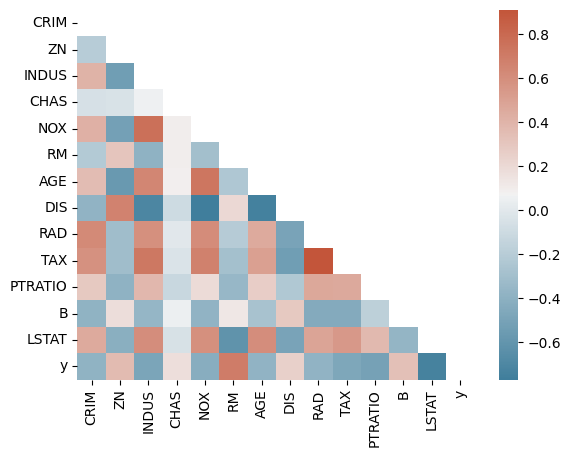

In [ ]:
# First we fefine a color palette for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create a mask to hide the upper triangle of the heatmap (to avoid redundancy)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap of the correlation matrix
sns.heatmap(corr, mask=mask, cmap=cmap)

## Preprocessing
We preprocess the data by standardising it and then we split into a train and test set using standard settings.

In [ ]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler # Importing the MinMaxScaler class from the preprocessing module of the sklearn library.

# Scaling the features in the dataset X using the fit_transform method of the MinMaxScaler object.
# This method computes the minimum and maximum values of the features in X and then scales the data accordingly.
scaler = MinMaxScaler()

# Transforming the data using the scaler object and creating a new DataFrame with the scaled values
df_scaled = scaler.fit_transform(df)

# Creating a new DataFrame with the scaled values and retaining the original column names
df_s = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
# Split the dataset into X and y.
# Here do we set X to be everything execpt price and 'y' equal to price

X = df_s.drop('y', axis=1)
y = df_s['y']

In [ ]:
# Now we want to splitting the dataset into the Training set and Test set
# Importing the train_test_split function from the model_selection module of the sklearn library.
from sklearn.model_selection import train_test_split

# Splitting the features (X) and target variable (y) into training and testing sets.
# test_size specifies the proportion of the dataset to include in the test split.
# random_state sets the seed for random number generation for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert the pandas Series to PyTorch tensors

# Training sets
tensor_data_X_train = torch.tensor(X_train.values, dtype=torch.float32)  # Convert X_train to a tensor
tensor_data_y_train = torch.tensor(y_train.values, dtype=torch.float32)  # Convert y_train to a tensor

# Test sets
tensor_data_X_test = torch.tensor(X_test.values, dtype=torch.float32)    # Convert X_test to a tensor
tensor_data_y_test = torch.tensor(y_test.values, dtype=torch.float32)    # Convert y_test to a tensor

In [ ]:
# Examining the size of the tensors
print('Training sets:')
print(tensor_data_X_train.size())
print(tensor_data_y_train.size())

print('')

print('Test sets:')
print(tensor_data_X_test.size())
print(tensor_data_y_test.size())

Training sets:
torch.Size([404, 13])
torch.Size([404])

Test sets:
torch.Size([102, 13])
torch.Size([102])


In [ ]:
# Display the first data point in the training set tensor
tensor_data_X_train[0]

tensor([0.1688, 0.0000, 0.6466, 0.0000, 0.4712, 0.3340, 0.9722, 0.0883, 1.0000,
        0.9141, 0.8085, 0.8804, 0.6396])

In [ ]:
# Reshape the first data point in the training set tensor to a 1D tensor
# In essence, a tensor is a multi-dimensional array that can hold data of varying types and sizes.
tensor_data_X_train[0].reshape(-1)

tensor([0.1688, 0.0000, 0.6466, 0.0000, 0.4712, 0.3340, 0.9722, 0.0883, 1.0000,
        0.9141, 0.8085, 0.8804, 0.6396])

In [ ]:
# Display the shape of the training set tensor
tensor_data_X_train.shape

torch.Size([404, 13])

In [ ]:
tensor_data_X_train.reshape(-1, 1)

tensor([[0.1688],
        [0.0000],
        [0.6466],
        ...,
        [0.8830],
        [0.1777],
        [0.2456]])

## Defining neural network architecture
Defining the architecture of a neural network involves specifying its structure, including the number of layers, the number of neurons in each layer, activation functions, and the connections between neurons.

*What is Neural Network Architecture?*

Neural network architecture refers to the design or structure of a neural network. It defines how the neurons are organized into layers and how these layers interact to process input data and produce output predictions. The architecture determines the complexity and capacity of the neural network to learn from data.

## Experiment with at least 5 different variations of hyperparameters

Based on the following overview, we may experiment with different loss functions, optimization algorithms, activation functions, number of hidden layers, number of epochs and learning rates depending on the type of neural network and the problem being solved.

### **Experiment 1**

First, we copy/paste example as a default model for further experimentation with hyperparameters.

Based on these hyperparameters the minimal loss is: **0.1993**

In [ ]:
# Initializing Hyperparameters
epochs = 3
learning_rate = 2

# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_ex1 = torch.nn.Sequential(torch.nn.Linear(13,39), # 13 input, 39 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(39,39), # 39 input, 39 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(39,1), # use the 39 as an input and map 1 output
                                 torch.nn.ReLU(),

                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_ex1.parameters(), lr=learning_rate)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(tensor_data_X_train.size(0)):

      # 2. Forward Pass
      output = model_ex1(tensor_data_X_train[i].reshape(-1))

      # 3. FeedForward Evaluation
      loss = loss_mse(output, tensor_data_y_train[i].reshape(-1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

      # Store the weight value for each sample of data
      #w_his.append(float(model_net1.weight.data[0][0]))

      # Display the loss for the current sample
      #print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= tensor_data_X_train.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-20-18bff41b6e72>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.4541
--------------------------------------------------


Epoch 2 Average Loss: 0.1993
--------------------------------------------------


Epoch 3 Average Loss: 0.1993
--------------------------------------------------



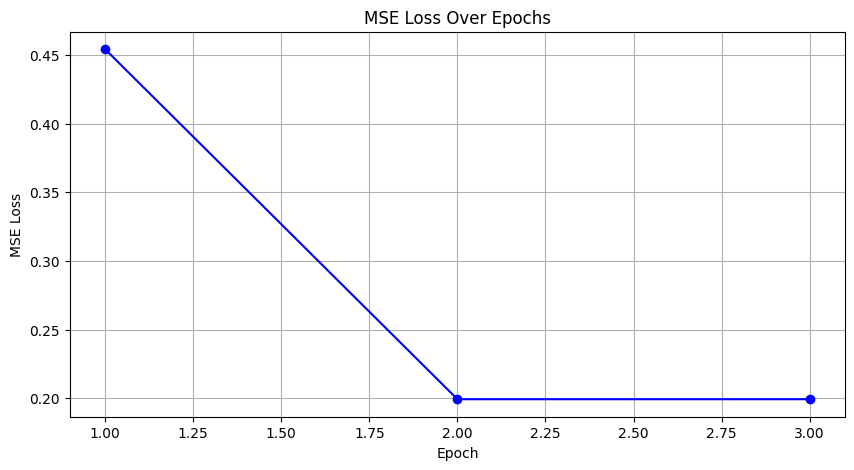

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

### **Experiment 2: Different parameter (Epochs, Learning rate, Dropout and Weight)**
Based on these hyperparameters the minimal loss is: **0.1993**

Changes compared to default network:

* Epochs from 3 to 10
* Learning rate from 2 to 1
* Weight from 50 to 100
* Dropout 0.33 to 0.50

In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 1

# Initializing Parameters
w = 100

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_ex2 = torch.nn.Sequential(torch.nn.Linear(13,39), # 13 input, 39 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.50),

                                 torch.nn.Linear(39,39), # 39 input, 39 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.50),

                                 torch.nn.Linear(39,1), # use the 39 as an input and map 1 output
                                 torch.nn.ReLU(),

                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(model_ex2.parameters(), lr=learning_rate)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(tensor_data_X_train.size(0)):

      # 2. Forward Pass
      output = model_ex2(tensor_data_X_train[i].reshape(-1))

      # 3. FeedForward Evaluation
      loss = loss_mse(output, tensor_data_y_train[i].reshape(-1))
      optimizer.zero_grad();

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

      # Store the weight value for each sample of data
      #w_his.append(float(model_net1.weight.data[0][0]))

      # Display the loss for the current sample
      #print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= tensor_data_X_train.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-24-5cd2806addc6>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.2003
--------------------------------------------------


Epoch 2 Average Loss: 0.1993
--------------------------------------------------


Epoch 3 Average Loss: 0.1993
--------------------------------------------------


Epoch 4 Average Loss: 0.1993
--------------------------------------------------


Epoch 5 Average Loss: 0.1993
--------------------------------------------------


Epoch 6 Average Loss: 0.1993
--------------------------------------------------


Epoch 7 Average Loss: 0.1993
--------------------------------------------------


Epoch 8 Average Loss: 0.1993
--------------------------------------------------


Epoch 9 Average Loss: 0.1993
--------------------------------------------------


Epoch 10 Average Loss: 0.1993
--------------------------------------------------



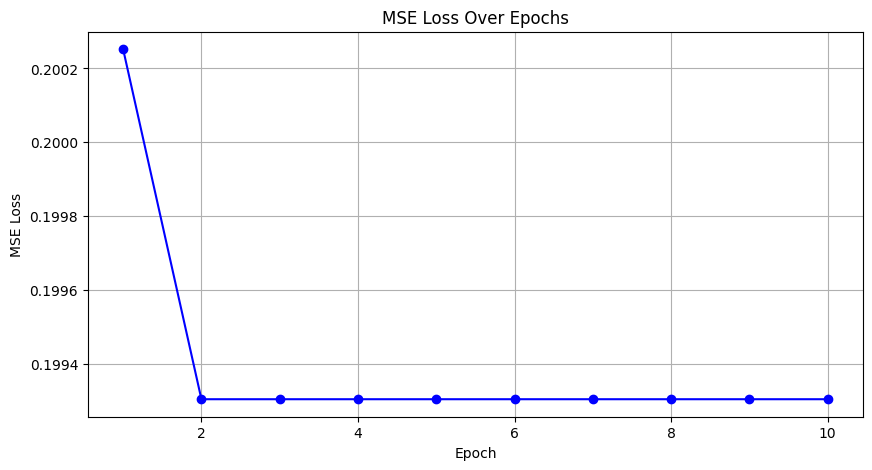

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

### **Experiment 3: Mini-batch gradient descent**
Based on these hyperparameters the minimal loss is: **0.2020**

Changes compared to default network:

* Adding batch size to 13

In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 1

# Initializing Parameters
w = 100

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_ex3 = torch.nn.Sequential(torch.nn.Linear(13,39), # 13 input, 39 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.50),

                                 torch.nn.Linear(39,39), # 39 input, 39 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.50),

                                 torch.nn.Linear(39,1), # use the 39 as an input and map 1 output
                                 torch.nn.ReLU(),

                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# Assuming batch_size is defined earlier in your code
batch_size = 13  # You can set your desired batch size

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_ex3.parameters(), lr=learning_rate)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over batches of data
    for i in range(0, tensor_data_X_train.size(0), batch_size):
        # Select a mini-batch
        batch_X = tensor_data_X_train[i:i+batch_size]
        batch_Y = tensor_data_y_train[i:i+batch_size]

        # 2. Forward Pass
        output = model_ex3(batch_X)

        # 3. FeedForward Evaluation
        loss = loss_mse(output, batch_Y.reshape(-1))
        optimizer.zero_grad()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        epoch_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= (tensor_data_X_train.size(0) / batch_size)
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")


<ipython-input-28-71aed9d62340>:35: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.2060
--------------------------------------------------


Epoch 2 Average Loss: 0.2020
--------------------------------------------------


Epoch 3 Average Loss: 0.2020
--------------------------------------------------


Epoch 4 Average Loss: 0.2020
--------------------------------------------------


Epoch 5 Average Loss: 0.2020
--------------------------------------------------


Epoch 6 Average Loss: 0.2020
--------------------------------------------------


Epoch 7 Average Loss: 0.2020
--------------------------------------------------


Epoch 8 Average Loss: 0.2020
--------------------------------------------------


Epoch 9 Average Loss: 0.2020
--------------------------------------------------


Epoch 10 Average Loss: 0.2020
--------------------------------------------------



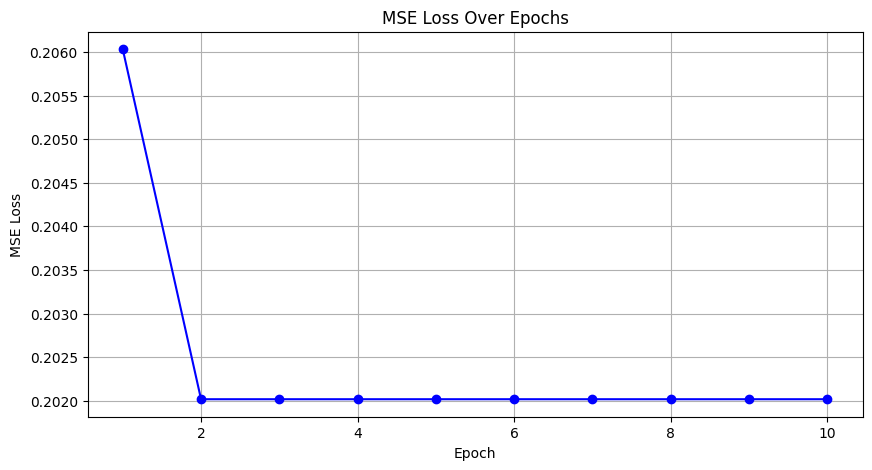

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

### **Experiment 4: Mini-batch gradient descent changing output layer to identity and parameters**
Based on these hyperparameters the minimal loss is: **0.0454**

Changes compared to default network:

* Epochs from 10 to 5
* Learning rate from 1 to 0.01
* Weight from 100 to 50
* Linear output from 39 to 40
* Dropout 0.50 to 0.33
* Output layer from ReLU to Identity

In [ ]:
# Initializing Hyperparameters
epochs = 5
learning_rate = 0.01

# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_ex4 = torch.nn.Sequential(torch.nn.Linear(13,40), # 13 input, 40 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(40,40), # 40 input, 40 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(40,1), # use the 40 as an input and map 1 output
                                 torch.nn.Identity(),
                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# Assuming batch_size is defined earlier in your code
batch_size = 13  # You can set your desired batch size

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_ex4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over batches of data
    for i in range(0, tensor_data_X_train.size(0), batch_size):
        # Select a mini-batch
        batch_X = tensor_data_X_train[i:i+batch_size]
        batch_Y = tensor_data_y_train[i:i+batch_size]

        # 2. Forward Pass
        output = model_ex4(batch_X)

        # 3. FeedForward Evaluation
        loss = loss_mse(output, batch_Y.reshape(-1))
        optimizer.zero_grad()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        epoch_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= (tensor_data_X_train.size(0) / batch_size)
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-30-0e20d4e44e36>:35: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.1002
--------------------------------------------------


Epoch 2 Average Loss: 0.0560
--------------------------------------------------


Epoch 3 Average Loss: 0.0475
--------------------------------------------------


Epoch 4 Average Loss: 0.0459
--------------------------------------------------


Epoch 5 Average Loss: 0.0454
--------------------------------------------------



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


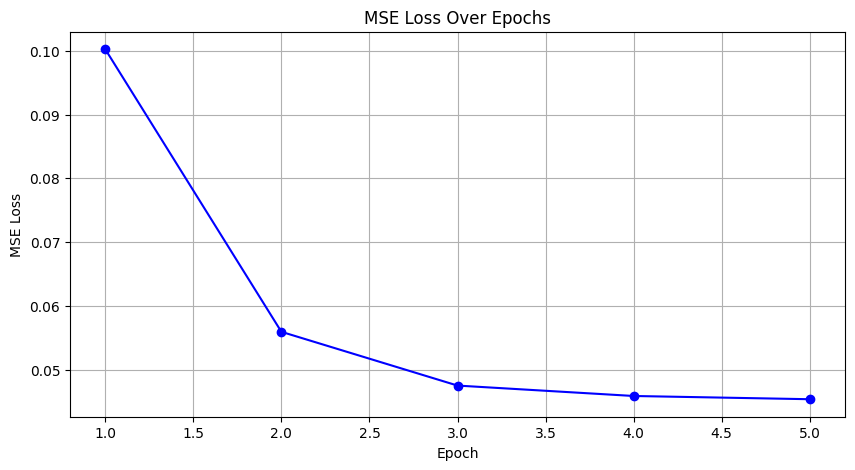

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

### **Experiment 5: Mini-batch change of parameters**
Based on these hyperparameters the minimal loss is: **0.0464**

Changes compared to default network:

* Epochs from 5 to 10
* Linear output from 40 to 25

In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.01

# Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_ex5 = torch.nn.Sequential(torch.nn.Linear(13,25), # 13 input, 25 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(25,25), # 25 input, 25 output
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.33),

                                 torch.nn.Linear(25,1), # use the 25 as an input and map 1 output
                                 torch.nn.Identity(),
                                 );

# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# Assuming batch_size is defined earlier in your code
batch_size = 13  # You can set your desired batch size

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_ex5.parameters(), lr=learning_rate)

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over batches of data
    for i in range(0, tensor_data_X_train.size(0), batch_size):
        # Select a mini-batch
        batch_X = tensor_data_X_train[i:i+batch_size]
        batch_Y = tensor_data_y_train[i:i+batch_size]

        # 2. Forward Pass
        output = model_ex5(batch_X)

        # 3. FeedForward Evaluation
        loss = loss_mse(output, batch_Y.reshape(-1))
        optimizer.zero_grad()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        epoch_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= (tensor_data_X_train.size(0) / batch_size)
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-26-217bbcc93334>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.1040
--------------------------------------------------


Epoch 2 Average Loss: 0.0553
--------------------------------------------------


Epoch 3 Average Loss: 0.0488
--------------------------------------------------


Epoch 4 Average Loss: 0.0482
--------------------------------------------------


Epoch 5 Average Loss: 0.0484
--------------------------------------------------


Epoch 6 Average Loss: 0.0476
--------------------------------------------------


Epoch 7 Average Loss: 0.0481
--------------------------------------------------


Epoch 8 Average Loss: 0.0464
--------------------------------------------------


Epoch 9 Average Loss: 0.0473
--------------------------------------------------


Epoch 10 Average Loss: 0.0465
--------------------------------------------------



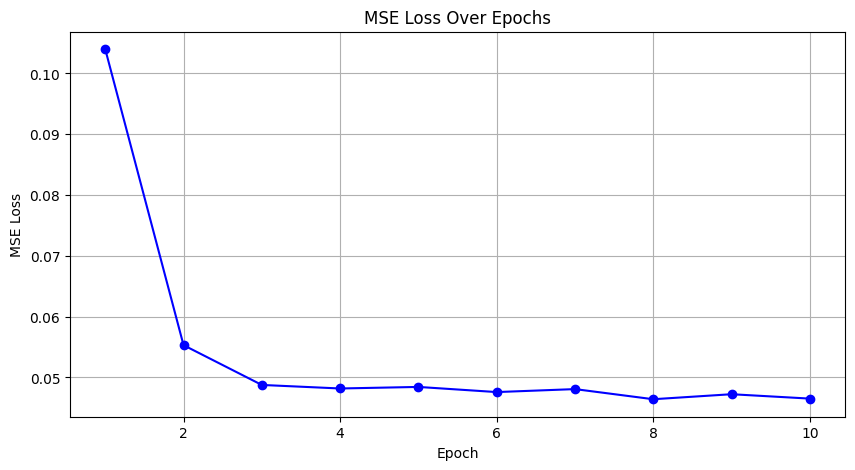

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

## Evaluating the Models on Test Data

In [ ]:
# Initialize lists to store test losses for each epoch
test_loss_set = []

# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0
    test_loss = 0.0  # Initialize test loss for this epoch

    # Training phase
    for i in range(0, tensor_data_X_train.size(0), batch_size):
        # Select a mini-batch
        batch_X = tensor_data_X_train[i:i+batch_size]
        batch_Y = tensor_data_y_train[i:i+batch_size]

        # Forward pass
        output = model_ex5(batch_X)

        # FeedForward Evaluation
        loss = loss_mse(output, batch_Y.reshape(-1))
        optimizer.zero_grad()

        # Backward pass / Gradient calculation
        loss.backward()

        # Store the loss for each epoch
        epoch_loss += loss.item()

        # Back Propagation / Update Weights
        optimizer.step()

    # Calculate and display average training loss for the epoch
    epoch_loss /= (tensor_data_X_train.size(0) / batch_size)
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Training Loss: {epoch_loss:.4f}")

    # Testing phase
    with torch.no_grad():  # Disable gradient calculation during testing
        for i in range(0, tensor_data_X_test.size(0), batch_size):
            # Select a mini-batch
            batch_X_test = tensor_data_X_test[i:i+batch_size]
            batch_Y_test = tensor_data_y_test[i:i+batch_size]

            # Forward pass on test data
            output_test = model_ex5(batch_X_test)

            # Compute test loss
            test_loss += loss_mse(output_test, batch_Y_test.reshape(-1)).item()

    # Calculate and display average test loss for the epoch
    test_loss /= (tensor_data_X_test.size(0) / batch_size)
    test_loss_set.append(test_loss)
    print(f"Epoch {epoch+1} Average Test Loss: {test_loss:.4f}\n{'-'*50}\n")

<ipython-input-28-35ec2ba18bcc>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Epoch 1 Average Training Loss: 0.0457
Epoch 1 Average Test Loss: 0.0407
--------------------------------------------------


Epoch 2 Average Training Loss: 0.0455
Epoch 2 Average Test Loss: 0.0410
--------------------------------------------------


Epoch 3 Average Training Loss: 0.0463
Epoch 3 Average Test Loss: 0.0402
--------------------------------------------------


Epoch 4 Average Training Loss: 0.0466
Epoch 4 Average Test Loss: 0.0405
--------------------------------------------------


Epoch 5 Average Training Loss: 0.0463
Epoch 5 Average Test Loss: 0.0406
--------------------------------------------------


Epoch 6 Average Training Loss: 0.0460
Epoch 6 Average Test Loss: 0.0394
--------------------------------------------------


Epoch 7 Average Training Loss: 0.0457
Epoch 7 Average Test Loss: 0.0397
--------------------------------------------------


Epoch 8 Average Training Loss: 0.0451
Epoch 8 Average Test Loss: 0.0404
--------------------------------------------------



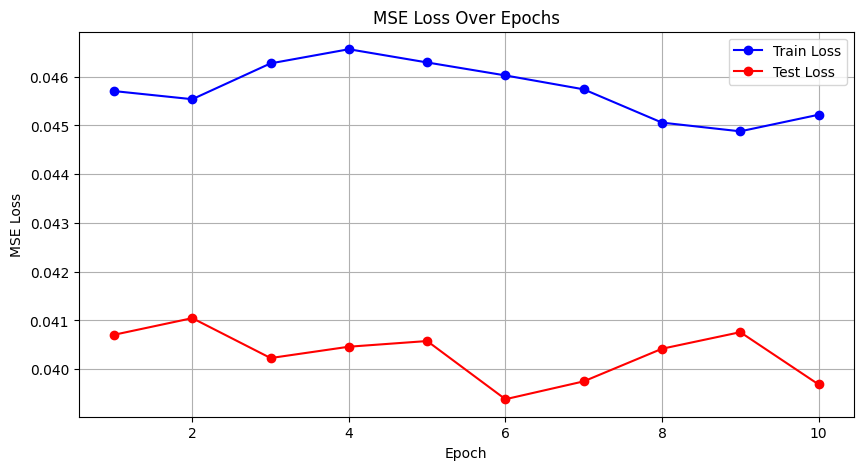

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
train_loss_values = [loss_set[epoch] for epoch in range(epochs)]
test_loss_values = test_loss_set  # Assuming you already have the test loss values

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, train_loss_values, marker='o', linestyle='-', color='b', label='Train Loss')
plt.plot(epochs_list, test_loss_values, marker='o', linestyle='-', color='r', label='Test Loss')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

After conducting 5 different variations of hyperparameters (e.g., number of layers/neurons, activation functions, epochs, optimizers, learning rates, etc.).

It has been evaulated that the best variations from the train data of the architecture of model_net5. It consists of:

- Hyperparameters that consist of 10 epochs and learning_rate of 0.01.
- Parameter with a weight of 50
- 2 hidden layers consisting of: Linear(13,25) + ReLU + Dropout(0.33) and Linear(25,25) + ReLU + Dropout(0.33)
- Output layer consisting of Linear(25,1) and Identity() for a regression problem
- Using Stochastic Gradient Descent as our Optimizer
- Batch size consist of 13

The average loss for epoch 10 showing a loss from train data of 0.0444 which is the best outcome.

In comparison with the test data. The average loss for epoch 10 showing a loss from train data of 0.0382 which is the best outcome.